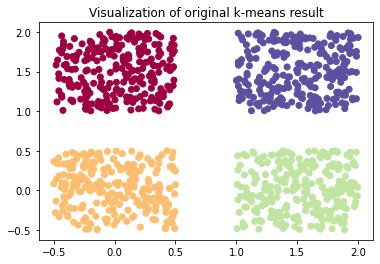

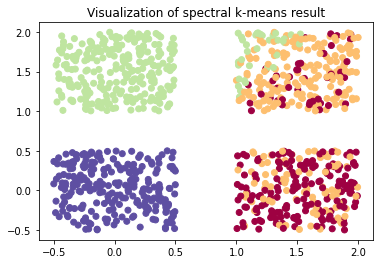

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import time

# Calculate pair-wise row vector distance between two matrices
def euclidean_distance(x, y):
    x_square = np.sum(x*x, axis=1, keepdims=True)
    y_square = np.sum(y*y, axis=1, keepdims=True).T
    distance = np.dot(x, y.T) * -2 + x_square + y_square
    np.maximum(distance, 0, distance)
    return distance

def kmeans(a, k, tol=1e-4): 
    # generate initial centroid index
    c_idx = np.random.choice(a.shape[0], k, replace=False)
    
    # c for centroid
    c = a[c_idx]
    
    while True:
        
        c0 = c.copy()
        
        distance = euclidean_distance(a, c)
        label = np.argmin(distance, axis=1)
        
        for i in range(k):
            c[i] = a[label == i].mean(axis=0)
        
        # if difference less than threshold, break
        if np.abs((c-c0)).mean() < tol:
            return label
        
def spectral_kmeans(a, k, tol=1e-4): 
    
    # Follow the slides, to transform features into k dimensions
    x = a @ a.T
#     e, v = scipy.linalg.eigh(x, subset_by_index=[x.shape[0]-k, x.shape[0]-1])
    
    e, v = scipy.linalg.eigh(x)
    label = kmeans(v[:, -k:], k)
    return label
    
# Random Data with 2 dimensions and supposed to be 4 clusters
data = np.random.rand(1000,2)-0.5
data[:500, 0]+=1.5
data[250:750, 1]+=1.5

# Spectral Version
spectral_label = spectral_kmeans(data, 4)

# Original Version
original_label = kmeans(data, 4)

# Visualization
plt.scatter(data[:, 0], data[:, 1], c=original_label, cmap='Spectral')
plt.title('Visualization of original k-means result')
plt.show()

plt.scatter(data[:, 0], data[:, 1], c=spectral_label, cmap='Spectral')
plt.title('Visualization of spectral k-means result')
plt.show()